In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

In [4]:
yes_det = os.path.join("drive/MyDrive/all_data/brain_tumor_datasets/yes/")

In [5]:

no_det = os.path.join("drive/MyDrive/all_data/brain_tumor_datasets/no/")

In [6]:
print(os.listdir(yes_det))

['Y170.JPG', 'Y162.jpg', 'Y156.JPG', 'Y163.JPG', 'Y111.JPG', 'Y21.jpg', 'Y153.jpg', 'Y161.JPG', 'Y180.jpg', 'Y166.JPG', 'Y194.jpg', 'Y113.JPG', 'Y20.jpg', 'Y193.JPG', 'Y117.JPG', 'Y112.JPG', 'Y165.JPG', 'Y195.JPG', 'Y186.jpg', 'Y24.jpg', 'Y188.jpg', 'Y116.JPG', 'Y148.JPG', 'Y17.jpg', 'Y168.jpg', 'Y2.jpg', 'Y14.jpg', 'Y185.jpg', 'Y114.JPG', 'Y1.jpg', 'Y108.jpg', 'Y15.jpg', 'Y187.jpg', 'Y106.jpg', 'Y103.jpg', 'Y164.JPG', 'Y10.jpg', 'Y169.jpg', 'Y160.JPG', 'Y104.jpg', 'Y157.JPG', 'Y18.JPG', 'Y183.jpg', 'Y11.jpg', 'Y154.jpg', 'Y167.JPG', 'Y109.JPG', 'Y184.JPG', 'Y192.JPG', 'Y13.jpg', 'Y159.JPG', 'Y155.JPG', 'Y181.jpg', 'Y102.jpg', 'Y12.jpg', 'Y101.jpg', 'Y147.JPG', 'Y100.JPG', 'Y16.JPG', 'Y182.JPG', 'Y23.JPG', 'Y115.JPG', 'Y120.JPG', 'Y105.jpg', 'Y146.JPG', 'Y19.JPG', 'Y107.jpg', 'Y22.jpg', 'Y158.JPG', 'Y32.jpg', 'Y254.jpg', 'Y42.jpg', 'Y33.jpg', 'Y58.JPG', 'Y29.jpg', 'Y252.jpg', 'Y90.jpg', 'Y55.jpg', 'Y69.jpg', 'Y98.JPG', 'Y245.jpg', 'Y45.JPG', 'Y74.jpg', 'Y248.JPG', 'Y46.jpg', 'Y54.jpg',

In [7]:
print(os.listdir(no_det))

['43 no.jpg', 'N11.jpg', '11 no.jpg', '48 no.jpeg', '37 no.jpg', 'No17.jpg', '19 no.jpg', '5 no.jpg', 'No11.jpg', 'no 4.jpg', '3 no.jpg', '38 no.jpg', 'no 94.jpg', 'No20.jpg', 'N15.jpg', '7 no.jpg', '25 no.jpg', '49 no.jpg', 'no 90.jpg', '33 no.jpg', 'N26.JPG', 'no 6.jpg', 'No16.jpg', 'N16.jpg', '35 no.jpg', 'no 89.jpg', 'No18.jpg', 'No13.jpg', 'no 9.png', '17 no.jpg', '26 no.jpg', '10 no.jpg', '50 no.jpg', 'No15.jpg', '15 no.jpg', '20 no.jpg', '4 no.jpg', 'no 100.jpg', 'N22.JPG', 'No22.jpg', '36 no.jpg', 'no 98.jpg', 'no 5.jpeg', 'no.jpg', 'N3.jpg', '1 no.jpeg', 'no 923.jpg', '28 no.jpg', '14 no.jpg', 'no 91.jpeg', '31 no.jpg', 'no 3.jpg', 'N6.jpg', '12 no.jpg', '41 no.jpg', '18 no.jpg', '2 no.jpeg', 'N21.jpg', '40 no.jpg', 'no 96.jpg', 'no 1.jpg', 'no 97.jpg', 'no 8.jpg', '9 no.jpg', '44no.jpg', 'no 10.jpg', 'No14.jpg', '29 no.jpg', '6 no.jpg', '32 no.jpg', 'no 2.jpg', 'N1.JPG', 'no 92.jpg', '46 no.jpg', '39 no.jpg', 'No21.jpg', '42 no.jpg', 'N20.JPG', '47 no.jpg', 'no 7.jpeg', '8 no

In [8]:
print("Total images of brain tumor detected: ", len(os.listdir(yes_det)))
print("Toatal images of brain tumor not detected: ", len(os.listdir(no_det)))

Total images of brain tumor detected:  155
Toatal images of brain tumor not detected:  98


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

nrows= 4
ncols=4
pic_index=0

In [10]:
import tensorflow as tf

In [30]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(300,300,3)),
                           tf.keras.layers.MaxPooling2D(2),

tf.keras.layers.Conv2D(32,3,activation='relu'),
tf.keras.layers.MaxPooling2D(2),

tf.keras.layers.Conv2D(32,3,activation='relu'),




tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dense(1,activation='relu')

                           
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 32)       

In [36]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [46]:
# Rescale

train_datagen=ImageDataGenerator(rescale=1/255.,
                                 rotation_range=.2,
                                 shear_range=.2,
                                 width_shift_range=.2)

train_genrerator=train_datagen.flow_from_directory('/content/drive/MyDrive/all_data/brain_tumor_datasets',
                                                   target_size=(300,300),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 253 images belonging to 2 classes.


In [33]:
# Define a Callback class that stops training once accuracy reaches 97.0%

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>.97):
      print("\n Reached 97% accuracy so cancelling training")
      self.model.stop_training=True

In [34]:
calling=myCallback()

In [52]:
history=model.fit(train_genrerator,
                  steps_per_epoch=8,
                  epochs=5,
                  callbacks=[calling])

Epoch 1/5
8/8 [==============================] - 6s 783ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 2/5
8/8 [==============================] - 6s 780ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 3/5
8/8 [==============================] - 6s 787ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 4/5
8/8 [==============================] - 6s 784ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 5/5
8/8 [==============================] - 6s 786ms/step - loss: 5.9068 - accuracy: 0.6126


**Here model  is overfiting so we will try to reduce it**

In [47]:
model_1=tf.keras.Sequential([
                            tf.keras.layers.Conv2D(32,3,activation='relu',
                                                   input_shape=(300,300,3)),
                            tf.keras.layers.Conv2D(32,3,activation='relu'),
                            tf.keras.layers.MaxPool2D(pool_size=2,
                                                      padding='valid'),
                            tf.keras.layers.Conv2D(32,3,activation='relu'),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(1,activation='sigmoid')
                      
])

In [48]:
model_1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [51]:
history_1=model_1.fit(train_genrerator,
                      steps_per_epoch=8,
                  epochs=15,
                  callbacks=[calling])

Epoch 1/15
8/8 [==============================] - 7s 818ms/step - loss: 0.4516 - accuracy: 0.8063
Epoch 2/15
8/8 [==============================] - 7s 818ms/step - loss: 0.4424 - accuracy: 0.8221
Epoch 3/15
8/8 [==============================] - 7s 817ms/step - loss: 0.4321 - accuracy: 0.8458
Epoch 4/15
8/8 [==============================] - 7s 818ms/step - loss: 0.5205 - accuracy: 0.7470
Epoch 5/15
8/8 [==============================] - 7s 820ms/step - loss: 0.8088 - accuracy: 0.7826
Epoch 6/15
8/8 [==============================] - 7s 820ms/step - loss: 0.3584 - accuracy: 0.8419
Epoch 7/15
8/8 [==============================] - 7s 816ms/step - loss: 0.3551 - accuracy: 0.8538
Epoch 8/15
8/8 [==============================] - 7s 812ms/step - loss: 0.4055 - accuracy: 0.8221
Epoch 9/15
8/8 [==============================] - 7s 811ms/step - loss: 0.3589 - accuracy: 0.8775
Epoch 10/15
8/8 [==============================] - 7s 823ms/step - loss: 0.3318 - accuracy: 0.8735
Epoch 11/15
8/8 [==

In [53]:
import numpy as np
from keras.preprocessing import image

[1.]
This is Tumor.. Tumor Detected


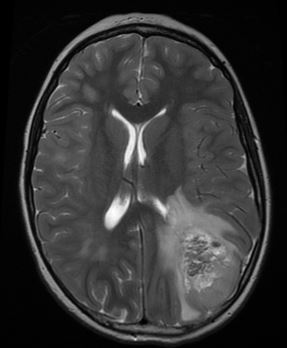

In [55]:
path = "/content/drive/MyDrive/all_data/brain_tumor_datasets/yes/Y100.JPG"

img = image.load_img(path,target_size=(300,300))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)

images = np.vstack([x])

classes = model_1.predict(images,batch_size=10)
print(classes[0])

if classes[0] > 0.5:
    print("This is Tumor.. Tumor Detected")
else:
    print("This is not tumor.. Tumor not Detected")
    
image.load_img(path)

Now our model is preicting either picture we provide has tumor or not 